# Úkoly

1. Vytvořte pole 3x4 typu `bool` se všemi prvky `True`.
2. Vytvořte matici 5x5 kde jediné nenulová prvky jsou [1, 2, 3, 4] pod hlavní diagonálou (nápověda - podívejte se na nápovědu funkce `diagflat`).
```
0 0 0 0 0
1 0 0 0 0
0 2 0 0 0
0 0 3 0 0 
0 0 0 4 0
```

In [20]:
import numpy as np
A = np.ones(shape=(3,4), dtype=bool)
print(A)
B = np.diagflat([1,2,3,4], -1)
print(B)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


3. Z pole 8x8 samých nul vyvořte pomocí řezů co nejelegantnějším způsobem 8x8 matici, která vypadá jako šachovnice.
```
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
```
4. Pomocí `np.random.randint` vytvořte vektor dvouciferných kladných celých čísel. Poté pomocí indexu typu masky nahraďte liché hodnoty jejich opačnou hodnotou. Např. [11, 20, 42, 33] -> [-11, 20, 42, -33].

In [69]:
C = np.zeros((8,8), dtype=int)
C[0::2, 1::2] = 1
C[1::2, 0::2] = 1
print(C)
D = np.random.randint(10,100,(5))
mask = np.array(D%2==1)
D[mask] = D[mask] *(-1)
print(mask)
print(D)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]
[False False  True False False]
[ 86  58 -17  60  74]


5. Ověřte empiricky na náhodné matici, že platí $(AB)^T = B^T A^T$


6. Pro náhodné 1D vektory $u, v$ vypočítejte dyadický součin $uv$ $$(uv)_{ij} = u_iv_j$$ pomocí `newaxis`. Zkontrolujte s `np.outer(u, v)`

In [112]:
A = np.random.randint(0,20,(5,6))
B = np.random.randint(0,20,(6,5))
print((A@B).T-(B.T@A.T))

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [111]:
u = np.random.randint(0, 10, (5))
v = np.random.randint(0, 10, (5))
print(u)
print(v)
s = v[np.newaxis, :]
t = u[:, np.newaxis]
print(s*t-np.outer(u, v))

[9 3 4 7 5]
[9 6 4 2 6]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


7. Vytvořte šachovnicovou matici pomocí `tile`.

In [63]:
C = np.tile(np.array([[0,1],[1,0]]), (4,4))
print(C)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


# Domácí úkoly
## 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj




In [85]:
A = integer_spiral(7)
print(A)

[[31. 30. 29. 28. 27. 26. 49.]
 [32. 13. 12. 11. 10. 25. 48.]
 [33. 14.  3.  2.  9. 24. 47.]
 [34. 15.  4.  1.  8. 23. 46.]
 [35. 16.  5.  6.  7. 22. 45.]
 [36. 17. 18. 19. 20. 21. 44.]
 [37. 38. 39. 40. 41. 42. 43.]]


In [83]:
def integer_spiral_numpy(n):
    A = np.zeros((n + 2, n + 2))
    c = n//2+1
    v = 1
    A[c, c] = v
    for i in range(1, c):
        A[c-i,c-i:c+i] = np.arange(v+2*i,v,-1)
        v+=2*i+1
        A[c-i+1:c+i+1,c-i] = np.arange(v,v+2*i)
        v+=2*i
        A[c+i,c-i+1:c+i+1] = np.arange(v,v+2*i)
        v+=2*i-1
        A[c-i:c+i,c+i] = np.arange(v+2*i,v,-1)
        v+=2*i
    return A[1:-1, 1:-1] 

B = integer_spiral_numpy(7)
print(B)

[[31. 30. 29. 28. 27. 26. 49.]
 [32. 13. 12. 11. 10. 25. 48.]
 [33. 14.  3.  2.  9. 24. 47.]
 [34. 15.  4.  1.  8. 23. 46.]
 [35. 16.  5.  6.  7. 22. 45.]
 [36. 17. 18. 19. 20. 21. 44.]
 [37. 38. 39. 40. 41. 42. 43.]]


## 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
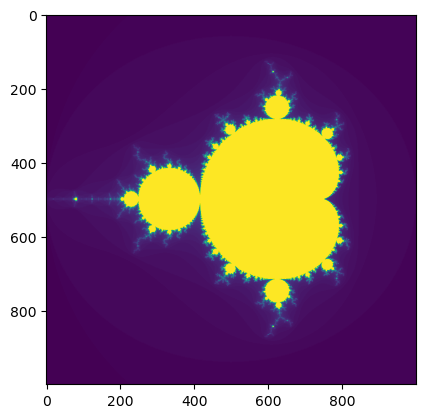

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [63]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, k = 100, n = 5):
    x = np.linspace(x_min, x_max, n)
    y = np.linspace(y_min, y_max, n, dtype=float)
    X, Y = np.meshgrid(x, y)
    G = X + 1j*Y
    D = np.zeros_like(G, dtype=int)
    z = np.zeros_like(G)
    for i in range(k):
        z = z**2 + G
        D[np.abs(z) > 2] = i**0.5
    return D

/tmp/ipykernel_1603/2298008503.py:9: RuntimeWarning: overflow encountered in square
  z = z**2 + G
/tmp/ipykernel_1603/2298008503.py:9: RuntimeWarning: invalid value encountered in square
  z = z**2 + G
/tmp/ipykernel_1603/2298008503.py:10: RuntimeWarning: overflow encountered in absolute
  D[np.abs(z) > 2] = i**0.5


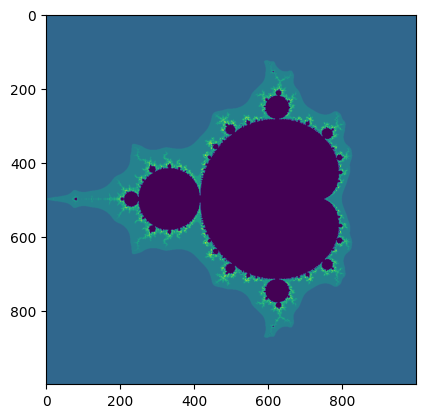

In [64]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
- Zkuste si číselnou spirálu vykreslit, a vykreslit různé funkce, můžete dostat zajímavé obrázky.
- Zkuste místo posloupnosti 1,2,... udělat spirálu pouze z prvočísel.
- Zkuste vykresilt další typy fraktálů, např. Julia set viz [Wikipedia](https://en.wikipedia.org/wiki/Julia_set).

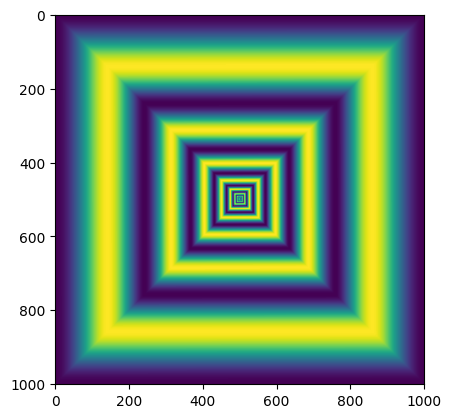

In [100]:
A = integer_spiral(1001)
#plt.imshow(np.sin(A*0.03))
plt.imshow(np.cos(np.log10(A**11)))

/tmp/ipykernel_1603/665525498.py:9: RuntimeWarning: overflow encountered in power
  z = z**3 + G
/tmp/ipykernel_1603/665525498.py:9: RuntimeWarning: invalid value encountered in power
  z = z**3 + G
/tmp/ipykernel_1603/665525498.py:10: RuntimeWarning: overflow encountered in absolute
  D[np.abs(z) > 0.1] = i


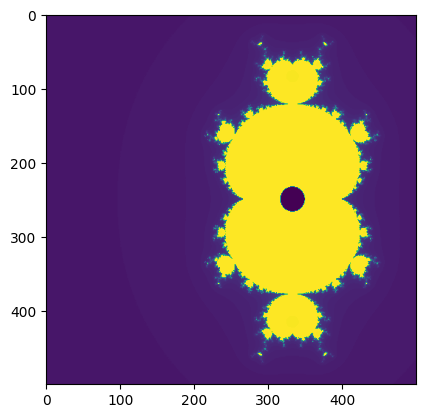

In [94]:
def muj_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, k = 100, n = 5):
    x = np.linspace(x_min, x_max, n)
    y = np.linspace(y_min, y_max, n, dtype=float)
    X, Y = np.meshgrid(x, y)
    G = X + 1j*Y
    D = np.zeros_like(G, dtype=int)
    z = np.zeros_like(G)
    for i in range(k):
        z = z**3 + G
        D[np.abs(z) > 0.1] = i
    return D

n = 500
k = 100

divergence_matrix = muj_set(n=n, k=k)
plt.imshow(divergence_matrix)